### **Defining the Problem Statement**

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such **city has more than 12,000** restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has **become difficult for new restaurants to compete** with established restaurants.

Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

* Location of the restaurant
* Approx Price of food
* Theme based restaurant or not
* Which locality of that city serves that cuisines with maximum number of restaurants
* The needs of people who are striving to get the best cuisine of the neighborhood
* Is a particular neighborhood famous for its own kind of food.


In [1]:
#load libraries

#Import Pandas for Data Manipulation and analysis
import pandas as pd
import numpy as np

#Visualization library
import matplotlib.pyplot as plt
%matplotlib inline

# Visualization library based on matplot lib. It Provides high-level interface for drawing attaractive and informative statistical graphics
import seaborn as sns
sns.set() # setting seaborn as default for plots


In [ ]:
# Import plotly for visualization
# pip install plotly==4.5.2

In [2]:
import plotly.graph_objects as go

In [3]:
# load dataset into the dataframe
df = pd.read_csv(r'C:\Users\mohammed_asik_s\Downloads\zomato-bangalore-restaurants\zomato.csv')

***

In [4]:
#getting basic details
df.shape

(51717, 17)

In [5]:
# getting basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [6]:
# getting missing values in the dataset
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

* We observe that there are some missing values in the data set.
* Features(rate, phone, location, rest_type, dish_liked, cuisines, approx_cost) has missing values

***

In [7]:
# Print first five rows of dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# **Columns description**

*	url: url of the restaurant in the zomato website
*	address: Address of the restaurant in Bengaluru
*	name: Name of the restaurant
*	online_order: Whether online ordering is available in the restaurant or not
*	book_table: Table book option available or not
*	rate: Overall rating of the restaurant out of 5
*	votes: Total number of rating for the restaurant as of the above mentioned date
*	phone: Phone number of the restaurant
*	location: Neighborhood in which the restaurant is located
*	rest_type: Restaurant type
*	dish_liked: Dishes people liked in the restaurant
*	cuisines: Food styles, separated by comma
*	approx_cost(for two people): Approximate cost for meal for two people
*	reviews_list: List of tuples containing reviews for the restaurant, each tuple
*	menu_item: List of menus available in the restaurant
*	listed_in(type): Type of meal
*	listed_in(city): Neighborhood in which the restaurant is listed


***

In [8]:
def counts(feature, title, xlabel, ylabel):
    plt.figure(figsize=(12,6.5))
    counting = df[feature].value_counts()[:20]
    sns.barplot(x=counting, y=counting.index,)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

### **Number of Restaurants in each area**

* As you can see BTM, HSR, Koramangala, JP Nagar, Whitefield, Indira Nagar has the most number of restaurants in the city.


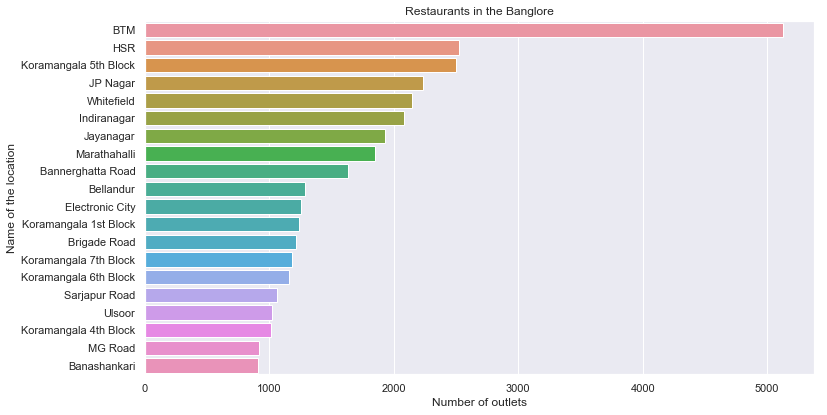

In [9]:
counts('location', 'Restaurants in the Banglore', 'Number of outlets', 'Name of the location')

***

### **Top Restaurant types in the city**

* As you can see Quick bites, Casual Dinning, Cafes, Delivery & Dessert Parlor types of restaurants has most number of outlets in the city
* Quick Bites & Casual Dinning types of restaurants plays major role in the city
* And we have 227 Missing datas in this feature. we need to deal with this accordingly.

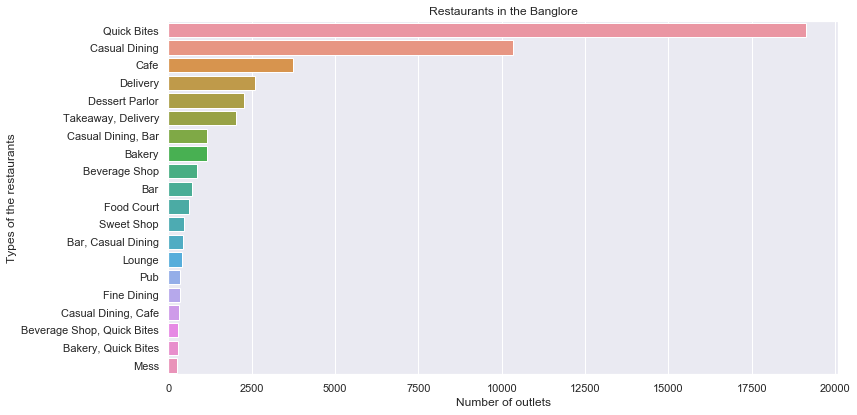

In [70]:
counts('rest_type', 'Restaurants in the Banglore', 'Number of outlets', 'Types of the restaurants')

***

### **Top Chain Restaurants chains in the city**

* As you can see CCD, Onesta, Justbake, Empire Restaurants, Five Star chicken, Kanti Sweets, petoo has most number of outlets the city

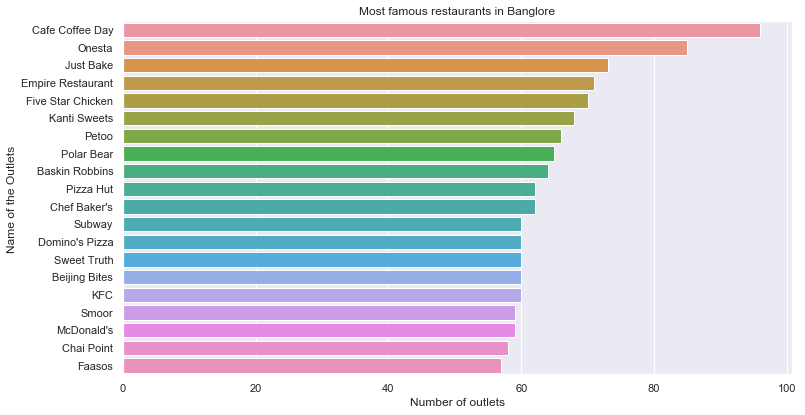

In [11]:
counts('name', 'Most famous restaurants in Banglore', 'Number of outlets', 'Name of the Outlets ')

***

### Cuisines 

* As we can see North Indian, Chineses, South Indian & Biryani are the most common foods in the city

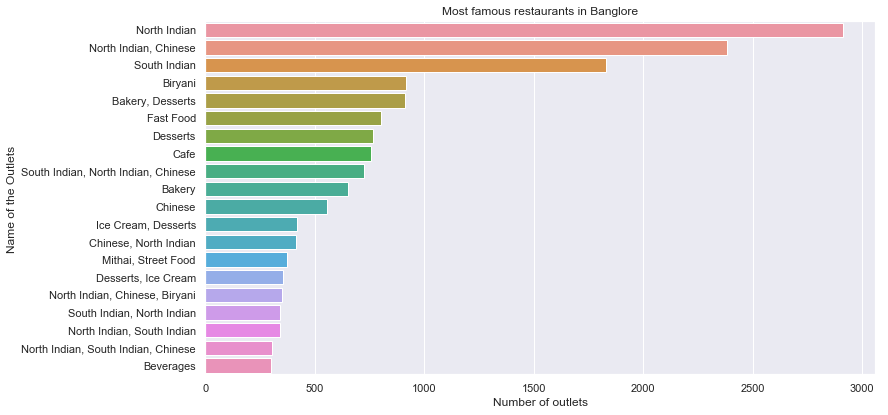

In [69]:
counts('cuisines', 'Most famous restaurants in Banglore', 'Number of outlets', 'Name of the Outlets ')

***

In [39]:
def piechart(feature, title, width, height):
    labels = df[feature].value_counts()
    trace=go.Pie(labels=labels.index, values=labels,hole=.3)
    layout=go.Layout(title=title, width=width, height=height)
    fig=go.Figure(data=[trace],layout=layout)
    fig.show()
    return
   

### Type of the restaurants

* As we already know, Quick bites & Casual Dining types has most number of restaurants in the city.
* Almost 38 % of the restaurants is Quick bites type and 20 % of the restaurants are Casual Dining

In [54]:
piechart('rest_type', 'Type of the Restaurants', 900, 700)

***

### Location of the Restaurants 

In [63]:
piechart('location', 'Location', 900, 700)

***

### Online Orders


* As clearly indicated, almost 60 % of the restaurants are accept online orders and 40 % restaurants do not accept online order but still they listed in Zomato website.

In [46]:
piechart('online_order', 'Accepting Online Orders', 400, 400)

***

### Table Booking

* Almost 90 percent of restaurants do not provide table booking facility. 

In [47]:
piechart('book_table', 'Table Booking', 400, 400)

***

***